In [2]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version  1.0.4
Version:  0.0.22


Make sure to update:

1. classy
2. numpynet
3. tqdm

# Perceptron aka Linear Neuron

In [43]:
data=make_dataset(bob=[[0,0],[1,1]],sally=[[0,1],[1,0]])

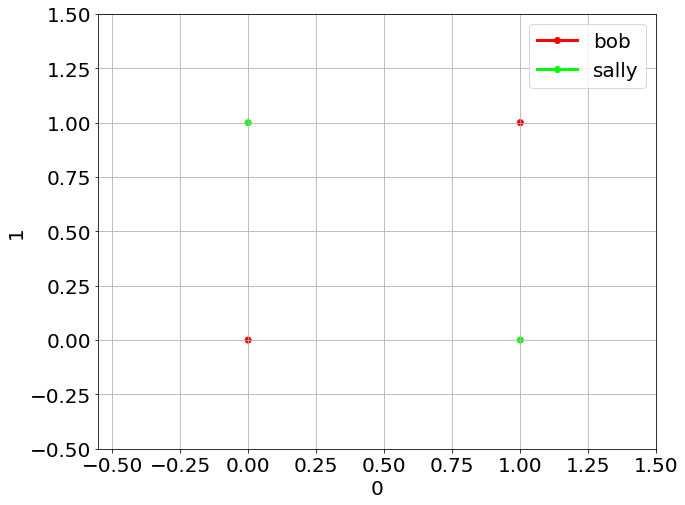

In [44]:
plot2D(data,axis_range=[-.55,1.5,-.5,1.5])

In [45]:
data

{'vectors': array([[0, 0],
        [1, 1],
        [0, 1],
        [1, 0]]),
 'targets': array([0, 0, 1, 1]),
 'target_names': ['bob', 'sally'],
 'feature_names': ['0', '1']}

In [46]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(2,'linear'),  # number of classes
    'cost':'mse',
})

In [47]:
C.fit(data.vectors,data.targets)

 23%|██▎       | 233/1000 [00:00<00:00, 1159.01it/s]

layer       filters  size              input                output
   0 input                     4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2
   1 connected                 4 x   1 x   1 x   2   ->     4 x   2
   2 cost                      4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2


100%|██████████| 1000/1000 [00:00<00:00, 1164.97it/s]


In [48]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))

[0 1 1 0]
('On Training Set:', 50.0)


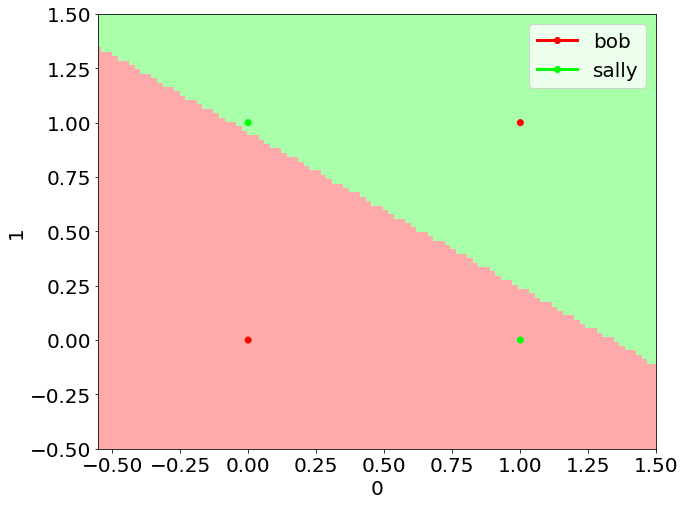

In [49]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

# Backprop

In [50]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(5,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [51]:
C.fit(data.vectors,data.targets,epochs=3000)

  2%|▏         | 65/3000 [00:00<00:04, 645.72it/s]

layer       filters  size              input                output
   0 input                     4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2
   1 connected                 4 x   1 x   1 x   2   ->     4 x   5
   2 connected                 4 x   1 x   1 x   5   ->     4 x   2
   3 cost                      4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2


100%|██████████| 3000/3000 [00:04<00:00, 707.82it/s]


In [52]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))


[0 0 1 1]
('On Training Set:', 100.0)


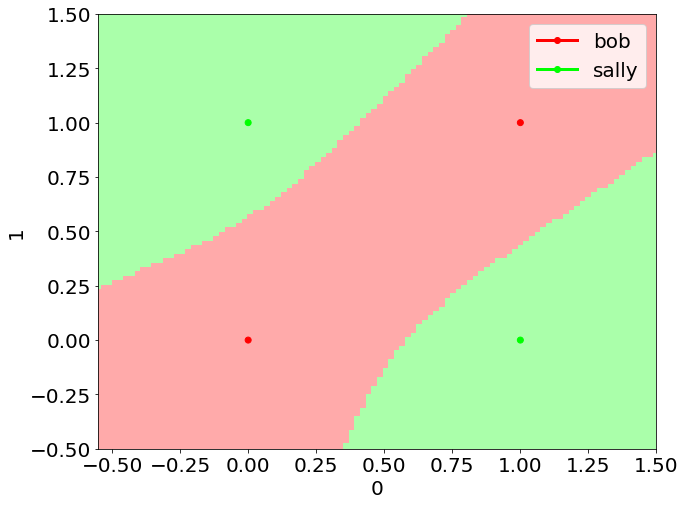

In [53]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

# Curvy Data

In [54]:
data=load_excel('../data/center-surround.xlsx')
data_train,data_test=split(data,test_size=0.2)

Sheet1 61 3
60 vectors of length 2
Feature names: 'x', 'y'
Target values given.
Target names: 'around', 'center'
Mean:  [-0.07740907  0.1386519 ]
Median:  [-0.03598226  0.0530847 ]
Stddev:  [0.54919693 0.52716191]
Original vector shape:  (60, 2)
Train vector shape:  (48, 2)
Test vector shape:  (12, 2)


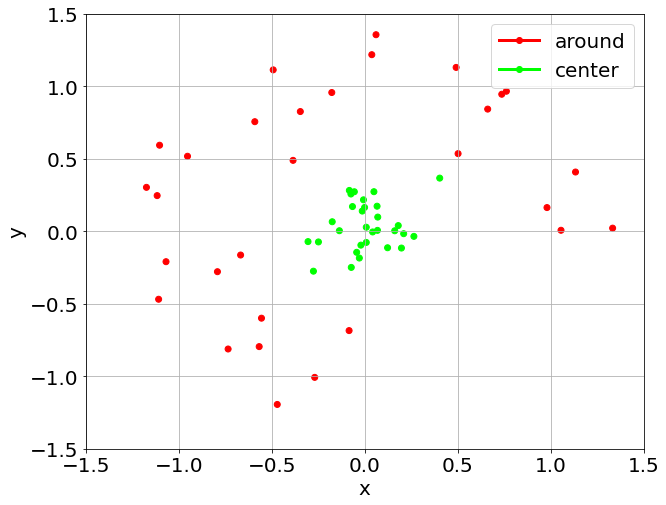

In [55]:
plot2D(data,axis_range=[-1.5,1.5,-1.5,1.5])

In [56]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(5,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [57]:
C.fit(data.vectors,data.targets,epochs=3000)

  5%|▍         | 139/3000 [00:00<00:04, 688.48it/s]

layer       filters  size              input                output
   0 input                    60 x   1 x   1 x   2   ->    60 x   1 x   1 x   2
   1 connected                60 x   1 x   1 x   2   ->    60 x   5
   2 connected                60 x   1 x   1 x   5   ->    60 x   2
   3 cost                     60 x   1 x   1 x   2   ->    60 x   1 x   1 x   2


100%|██████████| 3000/3000 [00:04<00:00, 695.06it/s]


In [58]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))


[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
('On Training Set:', 95.0)


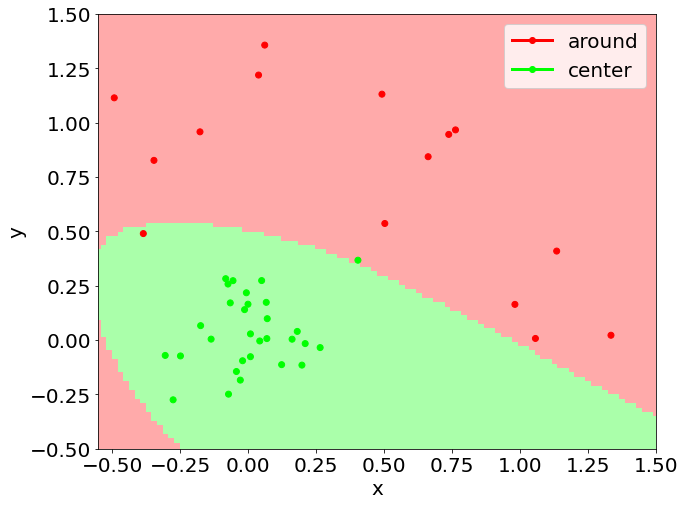

In [59]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

# Iris

In [73]:
data=load_excel('../data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [74]:
C=NumPyNetBackProp({
    'input':4,               # number of features
    'hidden':[(5,'logistic'),],
    'output':(3,'logistic'),  # number of classes
    'cost':'mse',
})

In [75]:
C.fit(data.vectors,data.targets,epochs=3000)

  4%|▍         | 124/3000 [00:00<00:04, 598.02it/s]

layer       filters  size              input                output
   0 input                   150 x   1 x   1 x   4   ->   150 x   1 x   1 x   4
   1 connected               150 x   1 x   1 x   4   ->   150 x   5
   2 connected               150 x   1 x   1 x   5   ->   150 x   3
   3 cost                    150 x   1 x   1 x   3   ->   150 x   1 x   1 x   3


100%|██████████| 3000/3000 [00:04<00:00, 641.40it/s]


In [76]:
C.weights[0]

array([[-2.08779105,  2.26204435,  3.1556329 , -2.39387065,  1.77669977],
       [-3.1168755 ,  2.91205678,  3.1640172 , -2.50155634,  1.07271431],
       [ 1.51900054, -0.55011284, -1.99742024,  0.64467266, -0.44271748],
       [ 1.30364157, -1.21181872, -1.7818899 ,  1.11497106, -0.85694848]])

In [77]:
C.weights[0].shape

(4, 5)

In [78]:
C.weights[1]

array([[ 1.35012314,  1.66047536, -2.95302801],
       [-2.22849346,  0.48730538, -0.29797958],
       [-1.59950118, -1.97409233,  2.39503481],
       [ 1.95915371, -2.89103178, -0.60747931],
       [-1.95369752,  0.58628683,  1.53019263]])

In [79]:
C.weights[1].shape

(5, 3)

# Eye

In [80]:
data=load_excel('../data/eye.xlsx')

Sheet1 9 9
8 vectors of length 8
Feature names: 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'
Target values given.
Target names: 'eight', 'five', 'four', 'one', 'seven', 'six', 'three', 'two'
Mean:  [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
Median:  [0. 0. 0. 0. 0. 0. 0. 0.]
Stddev:  [0.33071891 0.33071891 0.33071891 0.33071891 0.33071891 0.33071891
 0.33071891 0.33071891]


In [81]:
C=NumPyNetBackProp({
    'input':8,               # number of features
    'hidden':[(3,'logistic'),],
    'output':(8,'logistic'),  # number of classes
    'cost':'mse',
})

In [95]:
C.fit(data.vectors,data.targets,epochs=10000)

100%|██████████| 10000/10000 [00:13<00:00, 731.81it/s]


In [96]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))

[3 7 6 2 1 5 4 0]
('On Training Set:', 100.0)


In [97]:
C.weights

[array([[-1.40612144, -1.11347917,  2.9748042 ],
        [ 2.8259049 , -5.83054621, -3.86900501],
        [-7.44137476,  4.82361984,  2.05425142],
        [ 8.23011093,  9.84130814,  6.34792698],
        [ 4.56303961, -6.38301928,  2.60852328],
        [ 3.74968182,  3.59588846, -7.90667592],
        [-1.26755957,  4.22470426, -7.89872724],
        [-5.50568379, -5.64889101, -3.55282951]]),
 array([[ -8.72461461,   8.19423586,   4.91300597,  -9.35421449,
          -8.31977387,   9.88558229, -10.0958068 ,   9.04572936],
        [ -8.35847387,  -9.56222796,   5.74808211,  -8.60479325,
           9.50194723,   8.52956858,   8.15919979, -12.47966067],
        [ -7.24105985,   7.04729335,   4.230441  ,  10.16009573,
         -10.78123861, -11.59699378,   6.8155244 , -10.87831357]])]

In [98]:
C.weights[0]

array([[-1.40612144, -1.11347917,  2.9748042 ],
       [ 2.8259049 , -5.83054621, -3.86900501],
       [-7.44137476,  4.82361984,  2.05425142],
       [ 8.23011093,  9.84130814,  6.34792698],
       [ 4.56303961, -6.38301928,  2.60852328],
       [ 3.74968182,  3.59588846, -7.90667592],
       [-1.26755957,  4.22470426, -7.89872724],
       [-5.50568379, -5.64889101, -3.55282951]])

In [99]:
C.weights[0].shape

(8, 3)

In [100]:
C.weights[1]

array([[ -8.72461461,   8.19423586,   4.91300597,  -9.35421449,
         -8.31977387,   9.88558229, -10.0958068 ,   9.04572936],
       [ -8.35847387,  -9.56222796,   5.74808211,  -8.60479325,
          9.50194723,   8.52956858,   8.15919979, -12.47966067],
       [ -7.24105985,   7.04729335,   4.230441  ,  10.16009573,
        -10.78123861, -11.59699378,   6.8155244 , -10.87831357]])

In [101]:
C.weights[1].shape

(3, 8)

In [102]:
C.output(data.vectors)[0]

array([[6.27823217e-02, 2.21122047e-02, 9.27818642e-01],
       [8.21828373e-01, 2.02143153e-04, 1.35175759e-02],
       [1.60269202e-04, 8.95466178e-01, 8.36594094e-01],
       [9.99025869e-01, 9.99227821e-01, 9.97340031e-01],
       [9.63240946e-01, 1.16348368e-04, 8.99109906e-01],
       [9.20748546e-01, 7.15062969e-01, 2.41638604e-04],
       [7.14464278e-02, 8.24757431e-01, 2.43566494e-04],
       [1.10942388e-03, 2.42400436e-04, 1.84516179e-02]])

In [104]:
h,y=C.output(data.vectors)

In [105]:
around(h,2)

array([[0.06, 0.02, 0.93],
       [0.82, 0.  , 0.01],
       [0.  , 0.9 , 0.84],
       [1.  , 1.  , 1.  ],
       [0.96, 0.  , 0.9 ],
       [0.92, 0.72, 0.  ],
       [0.07, 0.82, 0.  ],
       [0.  , 0.  , 0.02]])